## The purpose of this project is educational and strictly non-profit.
### The whole dataset has been manually scraped from https://www.stadtschnellbahn-berlin.de/bahnhof/index.php and I am sincerely thankful for the people who had spent so much time of those to collect all this precious information. None of the text and pictures had been taken from the abovementioned website. All I did is collected the information (the dates in most of the cases) into one table in order to analyze the numbers behind it and build an interactive map to show the development of the S-Bahn network in Berlin, Germany. The actual latitude and longitudes are taken from Google Maps.
#### Some of the information provided might not be 100% accurate, for instance, some of the stations might not be listed at all or certain dates might be not correct.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Berlin_S_Bahn_stations_info.csv', parse_dates=[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], nrows=198)

In [3]:
df.head()

,#,Letter,Old name1,Old name2,Name,Opened as a service station,Opened,Electrified,Electrified 550 V,Electrified 6000 V,...,Reopened for regional trains,Reelectrified,Bahn1,Bahn2,Bahn3,Abbreviations1 (old),Abbreviations2 (old),Abbreviations,Latitude,Longitude
0,1,A,Bude 10 Adlershof,NaN,Adlershof,NaT,1872-01-01,1928-11-06,NaT,NaT,...,NaT,NaT,Görlitzer Bahn,NaN,NaN,Adl,NaN,BADL,52.43515,13.54108
1,2,A,NaN,NaN,Ahrensfelde,NaT,1898-05-01,1982-12-30,NaT,NaT,...,NaT,NaT,Wriezener Bahn,NaN,NaN,Ahr,NaN,BAF,52.57148,13.56608
2,3,A,NaN,NaN,Albrechtshof,NaT,1943-04-01,1951-08-14,NaT,NaT,...,1995-05-28,NaT,Hamburger Bahn,NaN,NaN,As,NaN,BAS,52.54955,13.12852
3,4,A,NaN,NaN,Alexanderplatz,NaT,1882-02-07,1928-06-11,NaT,NaT,...,NaT,NaT,Stadtbahn,NaN,NaN,Ale,NaN,BALX,52.52046,13.41450
4,5,A,Reinickendorf (Dorf),NaN,Alt-Reinickendorf,NaT,1893-10-01,1927-03-16,NaT,NaT,...,NaT,NaT,Kremmener Bahn,NaN,NaN,Rkd,NaN,BARF,52.57792,13.35001


In [4]:
df.columns

Index(['#', 'Letter', 'Old name1', 'Old name2', 'Name',
       'Opened as a service station', 'Opened', 'Electrified',
       'Electrified 550 V', 'Electrified 6000 V', 'Deelectrified 6000 V',
       'Electrified 15 kV', 'Officially completed', 'Closed for S-Bahn trains',
       'Closed', 'Deelectrified', 'Reopened', 'Reopened for S-Bahn trains',
       'Reopened for regional trains', 'Reelectrified', 'Bahn1', 'Bahn2',
       'Bahn3', 'Abbreviations1 (old)', 'Abbreviations2 (old)',
       'Abbreviations', 'Latitude', 'Longitude'],
      dtype='object')

In [5]:
df['Currently_operating_S-bahn'] = (~df['Closed for S-Bahn trains'].isnull() | ~df['Closed'].isnull()) == (~df['Reopened'].isnull() | ~df['Reopened for S-Bahn trains'].isnull())
df['Currently_operating_Regional'] = ~df['Reopened for regional trains'].isnull()
df['Currently_operating'] = (df['Currently_operating_S-bahn'] | df['Currently_operating_Regional'])

In [6]:
df[df['Currently_operating'] == False]

,#,Letter,Old name1,Old name2,Name,Opened as a service station,Opened,Electrified,Electrified 550 V,Electrified 6000 V,...,Bahn2,Bahn3,Abbreviations1 (old),Abbreviations2 (old),Abbreviations,Latitude,Longitude,Currently_operating_S-bahn,Currently_operating_Regional,Currently_operating
32,33,D,Dahlwitz,NaN,Dahlewitz,NaT,1884-09-07,1940-10-06,NaT,NaT,...,NaN,NaN,Dt,NaN,NaN,52.32650,13.41960,False,False,False
33,34,D,NaN,NaN,Dreilinden,NaT,1913-06-02,1928-07-10,NaT,NaT,...,NaN,NaN,Dr,NaN,NaN,52.40543,13.17660,False,False,False
34,35,D,NaN,NaN,Düppel,NaT,1939-07-15,1948-06-15,NaT,NaT,...,NaN,NaN,Dp,NaN,NaN,52.42124,13.22591,False,False,False
35,36,E,NaN,NaN,Ebersstraße,NaT,1897-05-01,1928-11-06,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,52.47691,13.34916,False,False,False
37,38,E,NaN,NaN,Eichkamp,NaT,1896-05-01,1928-06-06,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,52.49666,13.27191,False,False,False
51,52,G,NaN,NaN,Gartenfeld,NaT,1929-12-18,1929-12-18,NaT,NaT,...,NaN,NaN,Gtf,NaN,BGTF,52.54808,13.24812,False,False,False
66,67,H,NaN,NaN,Hennigsdorf Nord,NaT,1958-08-25,1958-08-25,NaT,NaT,...,NaN,NaN,Hdnu,Hdn,NaN,52.66030,13.20386,False,False,False
73,74,H,NaN,NaN,Hohenschöpping,NaT,1938-04-13,1938-04-13,NaT,NaT,...,NaN,NaN,Hch,NaN,NaN,52.66950,13.19501,False,False,False
85,86,K,NaN,NaN,Kohlhasenbrück,NaT,1946-02-16,1946-02-16,NaT,NaT,...,NaN,NaN,Khb,NaN,NaN,52.40036,13.14442,False,False,False
92,93,L,Lehrter Bahnhof,NaN,Lehrter Stadtbahnhof,NaT,1882-02-07,1928-06-11,NaT,NaT,...,NaN,NaN,Leh,NaN,NaN,52.52490,13.36949,False,False,False


In [7]:
def operation(opened, closed, reopened):
    if pd.isna(reopened - closed) == True:
        operating = (pd.to_datetime("today") - opened)/np.timedelta64(1, 'Y')
    else: 
        operating = (pd.to_datetime("today") - opened - (reopened - closed))/np.timedelta64(1, 'Y')
    return operating

operating_years = df.apply(lambda row: operation(row['Opened'], row['Closed'], row['Reopened']), axis = 1)

In [8]:
df['Operating_years'] = operating_years
df.head()

,#,Letter,Old name1,Old name2,Name,Opened as a service station,Opened,Electrified,Electrified 550 V,Electrified 6000 V,...,Bahn3,Abbreviations1 (old),Abbreviations2 (old),Abbreviations,Latitude,Longitude,Currently_operating_S-bahn,Currently_operating_Regional,Currently_operating,Operating_years
0,1,A,Bude 10 Adlershof,NaN,Adlershof,NaT,1872-01-01,1928-11-06,NaT,NaT,...,NaN,Adl,NaN,BADL,52.43515,13.54108,True,False,True,149.748441
1,2,A,NaN,NaN,Ahrensfelde,NaT,1898-05-01,1982-12-30,NaT,NaT,...,NaN,Ahr,NaN,BAF,52.57148,13.56608,True,False,True,123.417990
2,3,A,NaN,NaN,Albrechtshof,NaT,1943-04-01,1951-08-14,NaT,NaT,...,NaN,As,NaN,BAS,52.54955,13.12852,False,True,True,78.502625
3,4,A,NaN,NaN,Alexanderplatz,NaT,1882-02-07,1928-06-11,NaT,NaT,...,NaN,Ale,NaN,BALX,52.52046,13.41450,True,False,True,139.645564
4,5,A,Reinickendorf (Dorf),NaN,Alt-Reinickendorf,NaT,1893-10-01,1927-03-16,NaT,NaT,...,NaN,Rkd,NaN,BARF,52.57792,13.35001,True,False,True,116.617029


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   #                             198 non-null    int64         
 1   Letter                        198 non-null    object        
 2   Old name1                     73 non-null     object        
 3   Old name2                     12 non-null     object        
 4   Name                          198 non-null    object        
 5   Opened as a service station   4 non-null      datetime64[ns]
 6   Opened                        197 non-null    datetime64[ns]
 7   Electrified                   198 non-null    datetime64[ns]
 8   Electrified 550 V             6 non-null      datetime64[ns]
 9   Electrified 6000 V            2 non-null      datetime64[ns]
 10  Deelectrified 6000 V          1 non-null      datetime64[ns]
 11  Electrified 15 kV             1 

#### As we can see from the dataframe information, there are in total 198 stations in the dataset. 
#### 73 stations had initially launched with a different name and 12 of them had another naming after the launch until today's title. 
#### 4 stations opened as service stations and some of them had been transformed into regular stations later. 
#### Not all of the stations initially had a 750 V power supply from the beginning, as a matter of fact, 6, 2, and 1 station opened with 440 V, 6000 V, and 15 kV power supply respectfully. 
#### 107 stations had experienced closing and only 84 of them reopened eventually pointing out the fact that not all the opened stations are operating nowadays. It is also visible that 11 stations had closed only for S-Bahn trains and 6 of them reopened again for S-Bahn, while 2 of the stations reopened only for regional trains. There is only 1 station that was deelectrified and then electrified again.
#### Obviously, all 198 stations lie on a certain railway (Bahn) but also 11 of them intersect with 2 railways and 4 -- with 3 railways.

In [10]:
df['Electrification_time'] = df.Electrified - df.Opened

In [11]:
df['Electrification_months'] = (df.Electrified - df.Opened) / np.timedelta64(1, 'M')

In [12]:
df['Electrification_years'] = (df.Electrified - df.Opened) / np.timedelta64(1, 'Y')

#### In 3 lines above we are calculating how long did it take from the initial launch until the electrification of a station in days, months, and years.

In [13]:
df.head(10)

,#,Letter,Old name1,Old name2,Name,Opened as a service station,Opened,Electrified,Electrified 550 V,Electrified 6000 V,...,Abbreviations,Latitude,Longitude,Currently_operating_S-bahn,Currently_operating_Regional,Currently_operating,Operating_years,Electrification_time,Electrification_months,Electrification_years
0,1,A,Bude 10 Adlershof,NaN,Adlershof,NaT,1872-01-01,1928-11-06,NaT,NaT,...,BADL,52.43515,13.54108,True,False,True,149.748441,20763 days,682.165958,56.847163
1,2,A,NaN,NaN,Ahrensfelde,NaT,1898-05-01,1982-12-30,NaT,NaT,...,BAF,52.57148,13.56608,True,False,True,123.417990,30923 days,1015.971581,84.664298
2,3,A,NaN,NaN,Albrechtshof,NaT,1943-04-01,1951-08-14,NaT,NaT,...,BAS,52.54955,13.12852,False,True,True,78.502625,3057 days,100.437381,8.369782
3,4,A,NaN,NaN,Alexanderplatz,NaT,1882-02-07,1928-06-11,NaT,NaT,...,BALX,52.52046,13.41450,True,False,True,139.645564,16925 days,556.068913,46.339076
4,5,A,Reinickendorf (Dorf),NaN,Alt-Reinickendorf,NaT,1893-10-01,1927-03-16,NaT,NaT,...,BARF,52.57792,13.35001,True,False,True,116.617029,12218 days,401.420974,33.451748
5,6,A,NaN,NaN,Altglienicke,1940-01-01,1948-07-26,1962-02-26,NaT,NaT,...,BAGL,52.40779,13.55941,True,False,True,73.182872,4963 days,163.058790,13.588232
6,7,A,NaN,NaN,Anhalter Bahnhof,NaT,1939-10-09,1939-10-09,NaT,NaT,...,BAHU,52.50464,13.38198,True,False,True,80.810681,0 days,0.000000,0.000000
7,8,A,Mariendorf,NaN,Attilastraße,NaT,1895-02-15,1939-02-15,NaT,NaT,...,BATS,52.44738,13.36122,True,False,True,126.624079,16070 days,527.977987,43.998166
8,9,B,Nowawes,NaN,Babelsberg,NaT,1862-01-01,1928-06-11,NaT,NaT,...,BBAB,52.39154,13.09286,True,False,True,129.268897,24267 days,797.289472,66.440789
9,10,B,NaN,NaN,Baumschulenweg,NaT,1890-05-20,1928-11-06,NaT,NaT,...,BBMW,52.46779,13.48976,True,False,True,131.366134,14049 days,461.578266,38.464856


In [14]:
df.Bahn1.value_counts()

Ringbahn                                     27
Ostbahn                                      17
Stadtbahn                                    14
Stettiner Bahn                               12
Nordbahn                                     12
Dresdener Bahn                               11
Kremmener Bahn                               11
Schlesischen Bahn                            10
Wannseebahn                                  10
Anhalter Bahn                                10
Görlitzer Bahn                               10
Außenring                                     9
Nordsüd-S-Bahntunnel                          6
Spandauer Vorortbahn                          6
Wetzlarer Bahn                                5
Wriezener Bahn                                5
Stammbahn                                     3
Siemensbahn                                   3
Berlin-Potsdamer Eisenbahn                    3
Flughafen-S-Bahn                              3
Zweigbahn Schöneweide - Spindlersfeld   

In [15]:
df.sort_values(by=['Opened'])[['Name', 'Opened', 'Electrified']].head(10)

,Name,Opened,Electrified
128,Potsdam Hauptbahnhof,1838-09-21,1928-06-11
193,Zehlendorf,1838-09-22,1933-05-15
135,Rathaus Steglitz,1839-06-13,1933-05-15
13,Bernau,1842-08-01,1924-08-08
39,Erkner,1842-10-23,1928-06-11
118,Ostbahnhof,1842-10-23,1928-06-11
47,Friedrichshagen,1842-10-23,1928-06-11
88,Köpenick,1842-10-23,1928-06-11
162,Stresow,1846-10-15,1928-08-23
40,Falkensee,1848-01-01,1951-08-14


#### Top 10 earliest launched S-Bahn stations. It is noticeable that for all of them it took at least 50 years to be electrified.

In [16]:
df.sort_values(by=['Opened'], ascending=False)[['Name', 'Opened', 'Electrified']].head(10)

,Name,Opened,Electrified
165,Südkreuz (Ringbahnsteig),2005-04-05,2005-04-05
169,Teltow Stadt,2005-02-25,2005-02-25
166,Südkreuz (Vorortbahnsteig),2004-06-07,2004-06-07
12,Berlin Hbf,2002-05-26,2002-07-04
117,Osdorfer Straße,1998-09-25,1998-09-25
14,Bernau - Friedenstal,1997-09-30,1997-09-30
19,Birkenstein,1992-12-21,1992-12-21
139,Schichauweg,1990-12-01,1990-12-01
189,Wuhletal,1989-07-01,1989-07-01
177,Wartenberg,1985-12-20,1985-12-20


#### Top 10 latest launched S-Bahn stations. Obviously, all 10 of the stations that were launched have been already electrified.

In [17]:
df.sort_values(by=['Electrified'])[['Name', 'Opened', 'Electrified']].head(10)

,Name,Opened,Electrified
21,Blankenburg,1877-06-01,1924-08-08
27,Buch,1879-06-26,1924-08-08
156,Stettiner Vorortbahnhof,1895-12-01,1924-08-08
121,Pankow-Heinersdorf,1893-10-01,1924-08-08
13,Bernau,1842-08-01,1924-08-08
120,Pankow,1880-10-15,1924-08-08
83,Karow,1882-11-15,1924-08-08
137,Röntgental,1903-05-01,1924-08-08
195,Zepernick,1881-09-01,1924-08-08
187,Wittenau (Nordbahn),1877-07-10,1925-06-05


#### Top 10 firstly electrified S-Bahn stations. Eyecatching is the fact that 9 stations had been electrified the same day. Although it is not seen here but all these 9 stations belong to the Stettiner railway.

In [18]:
df.sort_values(by=['Electrified'], ascending=False)[['Name', 'Opened', 'Electrified']].head(10)

,Name,Opened,Electrified
165,Südkreuz (Ringbahnsteig),2005-04-05,2005-04-05
169,Teltow Stadt,2005-02-25,2005-02-25
166,Südkreuz (Vorortbahnsteig),2004-06-07,2004-06-07
12,Berlin Hbf,2002-05-26,2002-07-04
117,Osdorfer Straße,1998-09-25,1998-09-25
14,Bernau - Friedenstal,1997-09-30,1997-09-30
19,Birkenstein,1992-12-21,1992-12-21
139,Schichauweg,1990-12-01,1990-12-01
189,Wuhletal,1989-07-01,1989-07-01
177,Wartenberg,1985-12-20,1985-12-20


#### Top 10 lastly electrified S-Bahn stations. The list is identical to the top 10 lastly opened stations.

In [19]:
df.sort_values(by=['Electrification_time'], ascending=False)[['Name', 'Opened', 'Electrified', 'Electrification_time']].head(10)

,Name,Opened,Electrified,Electrification_time
40,Falkensee,1848-01-01,1951-08-14,37845 days
193,Zehlendorf,1838-09-22,1933-05-15,34568 days
135,Rathaus Steglitz,1839-06-13,1933-05-15,34304 days
128,Potsdam Hauptbahnhof,1838-09-21,1928-06-11,32770 days
38,Eichwalde,1874-06-01,1960-04-30,31379 days
118,Ostbahnhof,1842-10-23,1928-06-11,31277 days
39,Erkner,1842-10-23,1928-06-11,31277 days
47,Friedrichshagen,1842-10-23,1928-06-11,31277 days
88,Köpenick,1842-10-23,1928-06-11,31277 days
1,Ahrensfelde,1898-05-01,1982-12-30,30923 days


In [20]:
df.sort_values(by=['Electrification_time'])[['Name', 'Opened', 'Electrified', 'Electrification_time']].head(10)

,Name,Opened,Electrified,Electrification_time
153,Springpfuhl,1976-12-30,1976-12-30,0 days
41,Feuerbachstraße,1933-05-15,1933-05-15,0 days
169,Teltow Stadt,2005-02-25,2005-02-25,0 days
166,Südkreuz (Vorortbahnsteig),2004-06-07,2004-06-07,0 days
48,Friedrichstraße (Nordsüd-S-Bahn),1936-07-27,1936-07-27,0 days
165,Südkreuz (Ringbahnsteig),2005-04-05,2005-04-05,0 days
126,Plänterwald,1956-06-03,1956-06-03,0 days
52,Gehrenseestraße,1984-12-20,1984-12-20,0 days
163,Sundgauer Straße,1934-07-01,1934-07-01,0 days
157,Stolpe Süd,1954-06-04,1954-06-04,0 days


In [21]:
df.sort_values(by=['Electrification_months'], ascending=False)[['Name', 'Opened', 'Electrified', 'Electrification_months']].head(10)

,Name,Opened,Electrified,Electrification_months
40,Falkensee,1848-01-01,1951-08-14,1243.393088
193,Zehlendorf,1838-09-22,1933-05-15,1135.727633
135,Rathaus Steglitz,1839-06-13,1933-05-15,1127.053944
128,Potsdam Hauptbahnhof,1838-09-21,1928-06-11,1076.654551
38,Eichwalde,1874-06-01,1960-04-30,1030.953408
118,Ostbahnhof,1842-10-23,1928-06-11,1027.602209
39,Erkner,1842-10-23,1928-06-11,1027.602209
47,Friedrichshagen,1842-10-23,1928-06-11,1027.602209
88,Köpenick,1842-10-23,1928-06-11,1027.602209
1,Ahrensfelde,1898-05-01,1982-12-30,1015.971581


In [22]:
df.sort_values(by=['Electrification_years'], ascending=False)[['Name', 'Opened', 'Electrified', 'Electrification_years']].head(10)

,Name,Opened,Electrified,Electrification_years
40,Falkensee,1848-01-01,1951-08-14,103.616091
193,Zehlendorf,1838-09-22,1933-05-15,94.643969
135,Rathaus Steglitz,1839-06-13,1933-05-15,93.921162
128,Potsdam Hauptbahnhof,1838-09-21,1928-06-11,89.721213
38,Eichwalde,1874-06-01,1960-04-30,85.912784
118,Ostbahnhof,1842-10-23,1928-06-11,85.633517
39,Erkner,1842-10-23,1928-06-11,85.633517
47,Friedrichshagen,1842-10-23,1928-06-11,85.633517
88,Köpenick,1842-10-23,1928-06-11,85.633517
1,Ahrensfelde,1898-05-01,1982-12-30,84.664298


#### For Falkensee station it took 103 years to get electrified. Eventually, this exact station had been closed for S-Bahn stations and exists for only regional trains. For all top 10 stations from the list, it took more than 80 years to be electrified.

In [23]:
df.sort_values(by=['Operating_years'], ascending=False)[['Name', 'Opened', 'Operating_years', 'Currently_operating']].head(10)

,Name,Opened,Operating_years,Currently_operating
128,Potsdam Hauptbahnhof,1838-09-21,183.027701,True
13,Bernau,1842-08-01,179.167252,True
118,Ostbahnhof,1842-10-23,178.940006,True
88,Köpenick,1842-10-23,178.940006,True
193,Zehlendorf,1838-09-22,178.652526,True
135,Rathaus Steglitz,1839-06-13,177.686044,True
47,Friedrichshagen,1842-10-23,175.859860,True
39,Erkner,1842-10-23,175.350610,True
40,Falkensee,1848-01-01,173.748934,True
162,Stresow,1846-10-15,156.683560,True


In [24]:
df['Currently_operating'].value_counts()

True     177
False     21
Name: Currently_operating, dtype: int64

In [25]:
operating_years_list = []

for i in range(0, 200, 20):
    operating_years_list.append(i)
    
operating_years_list

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180]

In [26]:
operating_years_count_list = []

for i in operating_years_list:
    operating_years_count_list.append(df[(df['Operating_years'] < i+20) & (df['Operating_years'] >= i)]['#'].count())

In [27]:
twenty_year_operating_years_dist_df = pd.DataFrame(list(zip(operating_years_list, operating_years_count_list)), columns=['years', 'count'])
twenty_year_operating_years_dist_df.head()

,years,count
0,0,4
1,20,10
2,40,9
3,60,21
4,80,23


In [28]:
df[df['Name'] == 'Mahlow']['Operating_years']

98    115.291882
Name: Operating_years, dtype: float64

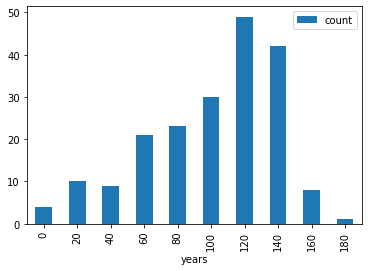

In [29]:
twenty_year_operating_years_dist_df.set_index('years').plot.bar()

In [30]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, FactorRange
from bokeh.transform import factor_cmap

output_file("S-Bahn_operating_years_dist.html")

data = {'years' : twenty_year_operating_years_dist_df['years'].values.tolist(),
        'count' : twenty_year_operating_years_dist_df['count'].values.tolist()}

source = ColumnDataSource(data=data)

x = [str(i) for i in twenty_year_operating_years_dist_df['years'].values.tolist()]

p = figure(height=500, width=1200, title="S-Bahn stations operating years distribution count",
           tools=['hover', 'pan', 'wheel_zoom'], tooltips="Over @years years: @count stations")

p.vbar(x='years', top='count', source=source, width=5)

#p.xgrid.grid_line_color = None

#p.y_range.start = 0

show(p)

In [31]:
electrif_delta_list = []

for i in range(0, 111, 10):
    electrif_delta_list.append(i)
    
electrif_delta_list

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [32]:
electrif_delta_count_list = []

for i in electrif_delta_list:
    electrif_delta_count_list.append(df[(df['Electrification_years'] < i+10) & (df['Electrification_years'] >= i)]['#'].count())

In [33]:
ten_year_elecrtif_delta_dist_df = pd.DataFrame(list(zip(electrif_delta_list, electrif_delta_count_list)), columns=['years', 'delta'])
ten_year_elecrtif_delta_dist_df.head()

,years,delta
0,0,57
1,10,12
2,20,13
3,30,25
4,40,42


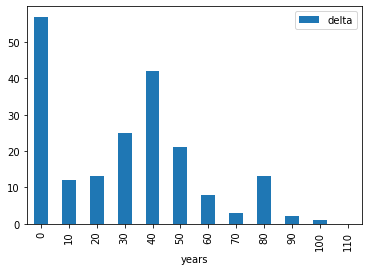

In [34]:
ten_year_elecrtif_delta_dist_df.set_index('years').plot.bar()

In [35]:
output_file("S-Bahn_electrification_delta.html")

data = {'years' : ten_year_elecrtif_delta_dist_df['years'].values.tolist(),
        'delta' : ten_year_elecrtif_delta_dist_df['delta'].values.tolist()}

source = ColumnDataSource(data=data)

x = [str(i) for i in ten_year_elecrtif_delta_dist_df['years'].values.tolist()]

p = figure(height=500, width=1200, title="S-Bahn stations electrification time delta count",
           tools=['hover', 'pan', 'wheel_zoom'], tooltips="Over @years years: @delta stations")

p.vbar(x='years', top='delta', source=source, width=5)

#p.xgrid.grid_line_color = None

#p.y_range.start = 0

show(p)

In [36]:
opening_years_list = pd.period_range(start=df.Opened.min(), end=df.Opened.max(), freq='10Y').year
opening_years_list

Int64Index([1838, 1848, 1858, 1868, 1878, 1888, 1898, 1908, 1918, 1928, 1938,
            1948, 1958, 1968, 1978, 1988, 1998],
           dtype='int64')

In [37]:
openings_list_l = []

for i in pd.period_range(start=df.Opened.min(), end=df.Opened.max(), freq='10Y'):
    openings_list_l.append(df[(df['Opened'].dt.year >= i.year) & (df['Opened'].dt.year < (i+1).year)])

In [38]:
openings_count_list = []

for i in enumerate(pd.period_range(start=df.Opened.min(), end=df.Opened.max(), freq='10Y')):
    openings_count_list.append(openings_list_l[i[0]].count()[0])

In [39]:
ten_year_open_dist_df = pd.DataFrame(list(zip(opening_years_list, openings_count_list)), columns=['years', 'openings'])
ten_year_open_dist_df.head()

,years,openings
0,1838,9
1,1848,1
2,1858,5
3,1868,36
4,1878,30


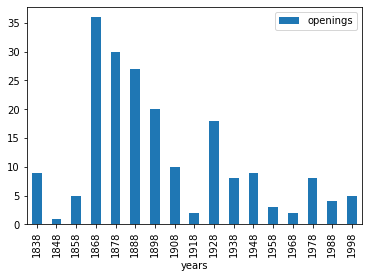

In [40]:
ten_year_open_dist_df.set_index('years').plot.bar()

In [41]:
output_file("S-Bahn_openings_count.html")

data = {'years' : ten_year_open_dist_df['years'].values.tolist(),
        'openings' : ten_year_open_dist_df['openings'].values.tolist()}

source = ColumnDataSource(data=data)

x = [str(i) for i in ten_year_open_dist_df['years'].values.tolist()]

p = figure(height=500, width=1200, title="S-Bahn stations openings count each 10 years",
           tools=['hover', 'pan', 'wheel_zoom'], tooltips="@years's: @openings stations opened")

p.vbar(x='years', top='openings', source=source, width=5)

#p.xgrid.grid_line_color = None

#p.y_range.start = 0

show(p)

In [42]:
electrif_years_list = pd.period_range(start=df.Electrified.min(), end=df.Electrified.max(), freq='10Y').year
electrif_years_list

Int64Index([1924, 1934, 1944, 1954, 1964, 1974, 1984, 1994, 2004], dtype='int64')

In [43]:
electrif_list_l = []

for i in pd.period_range(start=df.Electrified.min(), end=df.Electrified.max(), freq='10Y'):
    electrif_list_l.append(df[(df['Electrified'].dt.year >= i.year) & (df['Electrified'].dt.year < (i+1).year)])

In [44]:
electrif_count_list = []

for i in enumerate(pd.period_range(start=df.Electrified.min(), end=df.Electrified.max(), freq='10Y')):
    electrif_count_list.append(electrif_list_l[i[0]].count()[0])

In [45]:
ten_year_electif_dist_df = pd.DataFrame(list(zip(electrif_years_list, electrif_count_list)), columns=['years', 'electrification'])
ten_year_electif_dist_df.head()

,years,electrification
0,1924,129
1,1934,18
2,1944,17
3,1954,12
4,1964,1


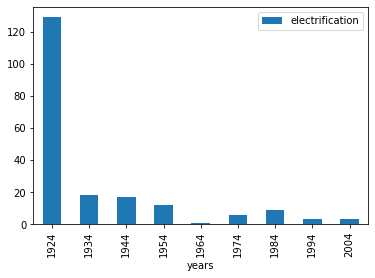

In [46]:
ten_year_electif_dist_df.set_index('years').plot.bar()

In [47]:
output_file("S-Bahn_electrifications_count.html")

data = {'years' : ten_year_electif_dist_df['years'].values.tolist(),
        'electrification' : ten_year_electif_dist_df['electrification'].values.tolist()}

source = ColumnDataSource(data=data)

x = [str(i) for i in ten_year_electif_dist_df['years'].values.tolist()]

p = figure(height=500, width=1200, title="S-Bahn stations electrifications count each 10 years",
           tools=['hover', 'pan', 'wheel_zoom'], tooltips="@years's: @electrification stations electrified")

p.vbar(x='years', top='electrification', source=source, width=5)

#p.xgrid.grid_line_color = None

#p.y_range.start = 0

show(p)

In [48]:
openings_electrif_list_l = []

for i in range(1830, 2011, 10):
    openings_electrif_list_l.append(i)

In [49]:
openings_part_count_list = []

for i in openings_electrif_list_l:
    openings_part_count_list.append(df[(df['Opened'].dt.year >= i) & (df['Opened'].dt.year < i+10)]['#'].count())

In [50]:
electrif_part_count_list = []

for i in openings_electrif_list_l:
    electrif_part_count_list.append(df[(df['Electrified'].dt.year >= i) & (df['Electrified'].dt.year < i+10)]['#'].count())

In [51]:
ten_year_openings_electif_dist_df = pd.DataFrame(list(zip(openings_electrif_list_l, openings_part_count_list, electrif_part_count_list)), columns=['years', 'openings', 'electrification'])
ten_year_openings_electif_dist_df.head()

,years,openings,electrification
0,1830,3,0
1,1840,7,0
2,1850,0,0
3,1860,9,0
4,1870,37,0


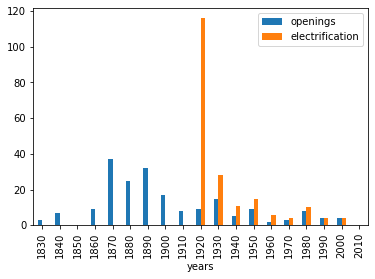

In [52]:
ten_year_openings_electif_dist_df.set_index('years').plot.bar()

In [53]:
from bokeh.palettes import Spectral5

output_file("S-Bahn_openings_and_electrifications_count.html")

years = ten_year_openings_electif_dist_df['years'].astype(str).values.tolist()
categories = ['openings', 'electrification']
          
data = {'years' : years,
        'openings': ten_year_openings_electif_dist_df['openings'].values.tolist(),
        'electrification' : ten_year_openings_electif_dist_df['electrification'].values.tolist()}

x = [(year, category) for year in years for category in categories]
counts = sum(zip(data['openings'], data['electrification']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), height=500, width=1200, title="S-Bahn stations openings and electrifications count each 10 years",
           tools=['hover', 'pan', 'wheel_zoom'], tooltips="@x: @counts stations")

p.vbar(x='x', top='counts', source=source, width=1, 
       fill_color=factor_cmap('x', palette=Spectral5, factors=categories, start=1, end=2))

p.xaxis.major_label_orientation = 1.6
#p.xaxis.visible = False
p.xgrid.grid_line_color = None

#p.y_range.start = 0

show(p)

In [54]:
import math
from ast import literal_eval

def merc(Coords):
    Coordinates = literal_eval(Coords)    
    lat = Coordinates[0]
    lon = Coordinates[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + lat * (math.pi/180.0)/2.0)) * scale    
    return (x, y)

In [55]:
df['Location'] = '('+df['Latitude'].astype(str)+', '+df['Longitude'].astype(str)+')'

In [56]:
df.tail()

,#,Letter,Old name1,Old name2,Name,Opened as a service station,Opened,Electrified,Electrified 550 V,Electrified 6000 V,...,Latitude,Longitude,Currently_operating_S-bahn,Currently_operating_Regional,Currently_operating,Operating_years,Electrification_time,Electrification_months,Electrification_years,Location
193,194,Z,Zehlendorf Mitte,NaN,Zehlendorf,NaT,1838-09-22,1933-05-15,NaT,NaT,...,52.43118,13.25870,True,False,True,178.652526,34568 days,1135.727633,94.643969,"(52.43118, 13.2587)"
194,195,Z,NaN,NaN,Zehlendorf Süd,NaT,1972-12-20,1972-12-20,NaT,NaT,...,52.42533,13.23922,False,False,False,48.779907,0 days,0.000000,0.000000,"(52.42533, 13.23922)"
195,196,Z,NaN,NaN,Zepernick,NaT,1881-09-01,1924-08-08,NaT,NaT,...,52.65954,13.53302,True,False,True,140.080892,15681 days,515.197437,42.933120,"(52.65954, 13.53302)"
196,197,Z,Hankels Ablage Bude 21,NaN,Zeuthen,NaT,1868-05-24,1951-04-30,NaT,NaT,...,52.34940,13.62702,True,False,True,153.354265,30290 days,995.174439,82.931203,"(52.3494, 13.62702)"
197,198,Z,NaN,NaN,Zoologischer Garten,NaT,1882-02-07,1928-06-11,NaT,NaT,...,52.50736,13.33235,True,False,True,139.645564,16925 days,556.068913,46.339076,"(52.50736, 13.33235)"


In [57]:
df['coords_x'] = df['Location'].apply(lambda x: merc(x)[0])
df['coords_y'] = df['Location'].apply(lambda x: merc(x)[1])

In [58]:
from bokeh.plotting import figure, output_file, show
from bokeh.tile_providers import OSM, get_provider

output_file("tile.html")

tile_provider = get_provider(OSM)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(1430000, 1530000), y_range=(6850000, 6930000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

show(p)

In [59]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import OSM, get_provider

tile_provider = get_provider(OSM)

p = figure(x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)
p.circle(x = df['coords_x'], y = df['coords_y'], color="green")
output_notebook()

show(p)

Loading BokehJS ...

In [60]:
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Slider, CustomJS, CustomJSFilter, CDSView, HoverTool
from bokeh.plotting import figure, output_file, show
import numpy as np

tile_provider = get_provider(OSM)

N = 1970
x = df['coords_x']
y = df['coords_y']
years = df['Opened']
elecrtified = df['Electrified']
name = df['Name']
railway = df['Bahn1']

source = ColumnDataSource(data=dict(x=x, y=y, years=years))#, name=name, railway=railway))

slider = Slider(start=1838, end=2005, step=1, value=N, title='Opening years')
callback = CustomJS(args=dict(source=source), code="""
   source.change.emit();
""")
slider.js_on_change('value', callback)

js_filter = CustomJSFilter(args=dict(slide=slider, data=source), code='''
const indices = [];
const { value } = slide;
// iterate through rows of data source and see if each satisfies some constraint
for (var i = 0; i < source.get_length(); i++){
    const dataYear = (new Date(source.data['years'][i])).getFullYear();
    if (dataYear <= value){
        indices.push(true);
    } else {
        indices.push(false);
    }
}
return indices;
''')


view = CDSView(source=source, filters=[js_filter])

#p = figure(x_axis_type="mercator", y_axis_type="mercator", 
#           tools=['hover', 'pan', 'wheel_zoom'], tooltips="@railway: @name")
p = figure(x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)
p.circle(x='x', y='y', source=source, color="green", view=view)

#tooltips = [('Name:', '@name'), ('Railway:', '@railway')]

#p.add_tools(HoverTool(tooltips=tooltips, renderers=[hover_glyph]))
           
# Arrange plots and widgets in layouts
layout = column(slider, p)

output_file('S_Bahn.html')


show(layout)

In [61]:
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Slider, CustomJS, CustomJSFilter, CDSView, HoverTool
from bokeh.plotting import figure, output_file, show

tile_provider = get_provider(OSM)

N = 1970
x = df['coords_x']
y = df['coords_y']
opened = df['Opened']
elecrtified = df['Electrified']
name = df['Name']
railway = df['Bahn1']

source = ColumnDataSource(data=dict(x=x, y=y, opened=opened, elecrtified=elecrtified, name=name, railway=railway))

slider = Slider(start=1838, end=2005, step=1, value=N, title='Opening years')
callback = CustomJS(args=dict(source=source), code="""
   source.change.emit();
""")
slider.js_on_change('value', callback)

js_filter = CustomJSFilter(args=dict(slide=slider, data=source), code='''
const indices = [];
const { value } = slide;
// iterate through rows of data source and see if each satisfies some constraint
for (var i = 0; i < source.get_length(); i++){
    const dataYear = (new Date(source.data['opened'][i])).getFullYear();
    if (dataYear <= value){
        indices.push(true);
    } else {
        indices.push(false);
    }
}
return indices;
''')


view = CDSView(source=source, filters=[js_filter])

p = figure(x_axis_type="mercator", y_axis_type="mercator", 
           tools=['hover', 'pan', 'wheel_zoom'], tooltips="@railway: @name")
p.add_tile(tile_provider)
p.circle(x='x', y='y', source=source, color="green", view=view, 
         hover_fill_color='black', hover_alpha=0.5, size=10, alpha=0.5,)
           
# Arrange plots and widgets in layouts
layout = column(slider, p)

output_file('S_Bahn.html')


show(layout)

In [62]:
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Slider, CustomJS, CustomJSFilter, CDSView, HoverTool
from bokeh.plotting import figure, output_file, show

tile_provider = get_provider(OSM)

N = 1970
x = df['coords_x']
y = df['coords_y']
opened = df['Opened']
elecrtified = df['Electrified']
name = df['Name']
railway = df['Bahn1']

source = ColumnDataSource(data=dict(x=x, y=y, opened=opened, elecrtified=elecrtified, name=name, railway=railway))

slider = Slider(start=1838, end=2005, step=1, value=N, title='Opening years')
callback = CustomJS(args=dict(source=source), code="""
   source.change.emit();
""")
slider.js_on_change('value', callback)

js_filter = CustomJSFilter(args=dict(slide=slider, data=source), code='''
const indices = [];
const { value } = slide;
// iterate through rows of data source and see if each satisfies some constraint
for (var i = 0; i < source.get_length(); i++){
    const dataYear = (new Date(source.data['opened'][i])).getFullYear();
    if (dataYear <= value){
        indices.push(true);
    } else {
        indices.push(false);
    }
}
return indices;
''')


view = CDSView(source=source, filters=[js_filter])

p = figure(x_axis_type="mercator", y_axis_type="mercator", x_range=(1430000, 1530000), y_range=(6850000, 6930000))
p.add_tile(tile_provider)
p.circle(x='x', y='y', source=source, color="green", view=view, 
         hover_fill_color='black', hover_alpha=0.5, size=10, alpha=0.5)
           
p.add_tools(HoverTool(
    tooltips=[
        ('Name', '@name'),
        ('Railway', '@railway'),
        ( 'Opened',   '@opened{%F}'),
        ( 'Elecrtified',  '@elecrtified{%F}'), 
    ],

    formatters={
        '@opened'      : 'datetime',
        '@elecrtified' : 'datetime'}
))

p.toolbar.active_tap = None
# Arrange plots and widgets in layouts
layout = column(slider, p)

output_file('S_Bahn.html')


show(layout)